<a href="https://colab.research.google.com/github/bingsen-wang/Math/blob/main/MultiOscillator_CircularToWave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Multiple Phase-Shifted Oscillators - Circular to Linear</h1></b>

Dr. Bingsen Wang

11/9/2024
</center>

#Python Code


0
0
250
500
0


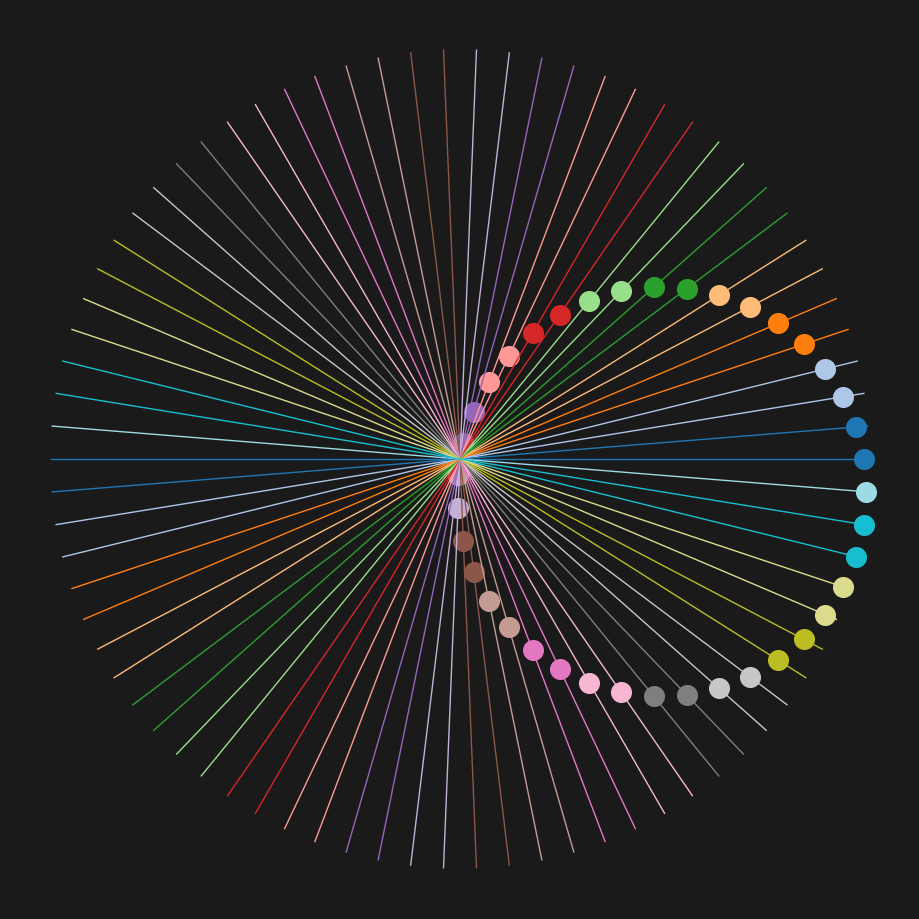

In [1]:
from numpy import linspace,cos,pi,abs,exp,array
from matplotlib import animation,pyplot,cm
pyplot.rcParams.update({'font.family':"sans serif",'animation.html':'jshtml',
                     'mathtext.fontset':'cm'})
def y(x,n):
  return [cos(x-k*2*pi/n) for k in range(1,n+1)]

Nf,x = 39,linspace(0,2*pi,250)
y_lst=y(x,Nf)
clst = list(cm.tab20.colors) #colors of lines
fig = pyplot.figure(figsize=([9,9]),facecolor='.1')
ax = fig.add_axes((0.0,0,1,1),xlim=[-1.1,1.1], ylim=[-1.1,1.1],fc='none')
ax.axis('off')
dots = [ax.scatter([],[],marker='o',s=200,color=clst[i%len(clst)]) for i in range(Nf)]
lines =[ax.plot([],[],'-',lw=1,color=clst[i%len(clst)])[0] for i in range(Nf)]
pcir = [exp(1j*2*k*pi/Nf) for k in range(Nf)]
def animate(ii):
  i,k=ii%len(x),ii//len(x)
  if i==0:
    print(ii) #for monitoring
  for j in range(Nf):
    xy0_s,xy0_e = array([pcir[j].real,pcir[j].imag]),-array([pcir[j].real,pcir[j].imag])
    xy1_s,xy1_e = array([-1+(j+.5)*2/Nf,1]),array([-1+(j+.5)*2/Nf,-1])
    xy01_s,xy01_e = xy0_s+(i+1)*(xy1_s-xy0_s)/len(x),xy0_e+(i+1)*(xy1_e-xy0_e)/len(x)
    p0,p1=y_lst[j][i]*xy0_s,array([xy1_s[0],y_lst[j][i]])
    p01=p0+(i+1)*(p1-p0)/len(x)
    if k==0:
      lines[j].set_data([xy0_s[0],xy0_e[0]],[xy0_s[1],xy0_e[1]])
      dots[j].set_offsets(p0)
    elif k==1:
      lines[j].set_data([xy01_s[0],xy01_e[0]],[xy01_s[1],xy01_e[1]])
      dots[j].set_offsets(p01)
    else:
      lines[j].set_data([xy1_s[0],xy1_e[0]],[xy1_s[1],xy1_e[1]])
      dots[j].set_offsets(p1)
  return
anim = animation.FuncAnimation(fig, animate, frames=len(x)*3, interval=50)
anim.save("MultiOscillator_Circular2Linear.mp4", writer=animation.FFMpegWriter(fps=50), dpi = 200)